<div style="display: flex;">
    <h1>Machine Learning on Titanic dataset</h1>
    <img src="img/titanic.jpeg" height="100px" width="250px"/>
</div>

<div style="border: 1px dashed black;
            padding: 10px 10px 10px 10px;">
    <h4>Machine Learning general workflow :</h4>
    <ol>
        <li><strong>Defining a quantitative objective</strong></li>
        <li><strong>EDA (Exploratory Data Analysis):</strong> Understanding as much as possible the data in order to define modelling startegy.
        <ul>
            <li><span style="color: blue;">Identifying the target</span></li>
            <li><span style="color: blue;">Number of rows and columns</span></li>
            <li><span style="color: blue;">Variables types</span></li>
            <li><span style="color: blue;">Identification of missing values</span></li>
            <li><span style="color: red;">Visualizing the target</span></li>
            <li><span style="color: red;">Understanding all the variables</span></li>
            <li><span style="color: red;">Visualizing relationships between the target and the features</span></li>
            <li><span style="color: red;">Identifying outliers</span></li>
        </ul></li>
        <li><strong>Pre-Processing: </strong>Transforming the data in order to have a proper input for modelling.
        <ul>
            <li>Splitting data into Train set and Test set</li>
            <li>Removing/Replacing NA</li>
            <li>Encoding variables</li>
            <li>Removing outliers which drop down model performances</li>
            <li>Feature selection</li>
            <li>Feature engineering</li>
            <li>Feature scaling</li>
        </ul></li>
        <li><strong>Modelling: </strong> Giving answer to the former objective.
        <ul>
            <li>Defining a scoring function</li>
            <li>Training of the differents models</li>
            <li>Optimization with GridSearchCV</li>
            <li>(Optional) Analysis of errors and go back to EDA/Pre processing</li>
            <li>Learning curve and decision</li>
        </ul></li>
    </ol>
    <p>(<span style="color: blue;">*="front-end" part</span>, <br/>
        <span style="color: red;">*="back-end" part</span>)</p>
</div>

<h3>1) Objective</h3>

<strong>We want to predict the 'survived' variable (binary) with a precision of 95%</strong> from features. </br>In order to choose a relevant metrics for evaluation (and thus be more precise in our objective), we first have to explore the data.

<h3>2) EDA</h3>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
titanic = sns.load_dataset("titanic")
print("{} rows X {} columns".format(titanic.shape[0], titanic.shape[1]))
titanic.head()

891 rows X 15 columns


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


We decided to drop redundant features and useless features. It will ease the visualization steps.

In [43]:
titanic = titanic.drop(labels=['sibsp', 'parch', 'embarked', 'class', 'who',
                               'adult_male', 'deck', 'embark_town', 'alive', 
                               'alone'], axis=1)

In [44]:
titanic.describe()

,survived,pclass,age,fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


By comparing the count value for the 'age' feature and other features we can see that there are missing values in the 'age' feature (177 observations).

Visualizing the target :

/home/anthony/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Barplot of survival variable')

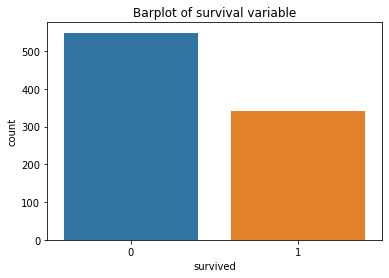

In [40]:
sns.countplot(titanic['survived'])
plt.title("Barplot of survival variable")

Visualizing the relationships between variables :

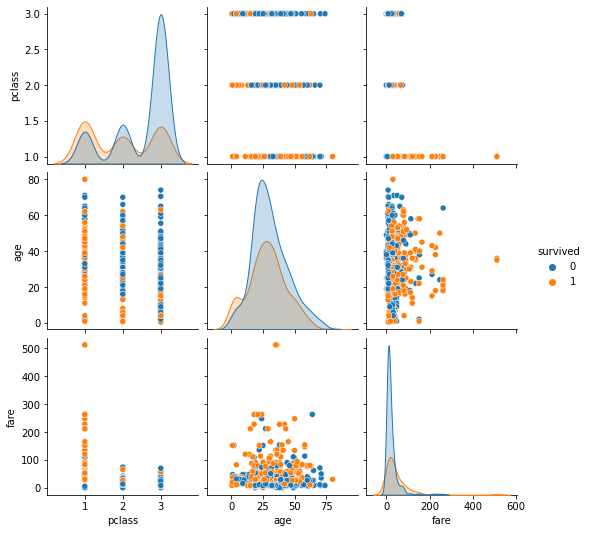

In [46]:
sns.pairplot(titanic, hue='survived')